#Variational Autoencoder

Variational autoencoder models the underlying probability distribution of data so that it could generate new data from that distribution.
Latent variable is used to describe the data. 

Inorder to model the data we have to find P(X).
  $P(X)=\int P(X|z)P(z)$

 where Z :is the latent variable
 
  X :is the input 
 
 p(x):probability distribution of the data

 p(z) :probability distribution of latent variable 

 P(X|z): distribution of generating data given latent variable

The idea of VAE is to infer  probability of latent variable p(z) using P(z|X)

P(z|x) is infered using a method called Variational inference. The main idea of Varaitional inference is to suggest the inference by thinking it is an optimization problem. by modeling the true distribution P(z|X) using simpler distribution that is easy to evaluate and the difference between those two distribution is minimized using KL divergence metrics. which tell how difference the original and the decoded probability is .

P(z|x) can be infered by Q(z|X) where Q(z|x) has a simple distribution such as Guassian.


$D_{kl}[Q(z|X)||P(z|X)]=\sum_{z}{Q(z|x)log(\frac{Q(z|x)}{p(z|x})}$

$=E_{z~Q(z|x)}[log(Q(z|x))-log(P(Z|x))]$

$= E[log(Q(Z|x)-log P(X|Z)-log P(z)+logP(x)]$


rearranging the equation we get

$= E_{z}[log(p(X|z))]-D_{KL}[Q(z|x)||P(z)]$

this is the VAE objective function where the first term is the reconstruction likelihood and the second term  ensures that our learned distribution Q is similar to the prior distribution P.


**Reparameterization trick**:
it makes the Variational Autoencoder an eligible candidate for backpropogation.
In the reparameterization trick we add a fixed value such as epsilon that allows the variance and the mean to be learning paramters. epsilon remains as a random variable with a very low value hence does not cause a shift in the network.





In [2]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 93kB/s 
     |████████████████████████████████| 491kB 39.2MB/s 
     |████████████████████████████████| 3.2MB 37.3MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
MNIST = input_data.read_data_sets('../MNIST_data', one_hot=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/d

In [0]:
batch_size =64

image_dimension =784
neural_network_dimension=256

latent_variable_dimension_list=[2,8,16]  #[2,8,16]

def xavier(in_shape):
  val=tf.compat.v1.random_normal(shape=in_shape,stddev=1./tf.sqrt(in_shape[0]/2.0))
  print(val)
  return val

def loss_function(original_img,recontructed_img):

    
    recon_loss=original_img*tf.log(1e-10+recontructed_img)+(1-original_img)*tf.log(1e-10+1-recontructed_img)
    recon_loss=-tf.reduce_sum(recon_loss,1)
    kl_loss = 0.5 * tf.reduce_sum(tf.exp(SD_layer) + Mean_layer**2 - 1. - SD_layer, 1)


    network_loss=tf.reduce_mean(recon_loss+kl_loss)
    return network_loss  

#output visualization
import matplotlib.gridspec as gridspec
def plot(samples):
        fig = plt.figure(figsize=(4, 4))
        gs = gridspec.GridSpec(4, 4)
        gs.update(wspace=0.05, hspace=0.05)

        for i, sample in enumerate(samples):
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
        return fig    

Tensor("random_normal:0", shape=(784, 256), dtype=float32)
Tensor("random_normal_1:0", shape=(256, 2), dtype=float32)
Tensor("random_normal_2:0", shape=(256, 2), dtype=float32)
Tensor("random_normal_3:0", shape=(2, 256), dtype=float32)
Tensor("random_normal_4:0", shape=(256, 784), dtype=float32)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
loss is 593.1980590820312at iteration 0


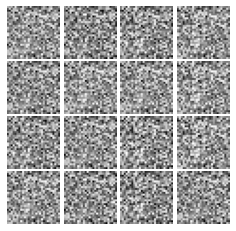

loss is 182.64903259277344at iteration 1000


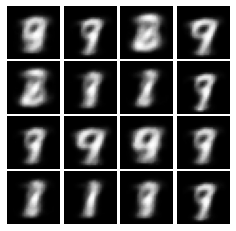

loss is 166.95272827148438at iteration 2000


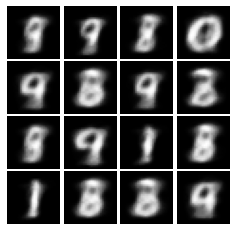

loss is 166.25970458984375at iteration 3000


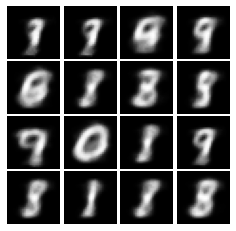

loss is 167.637451171875at iteration 4000


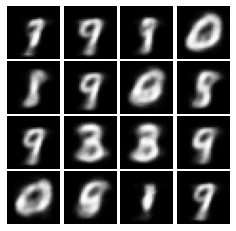

loss is 163.22557067871094at iteration 5000


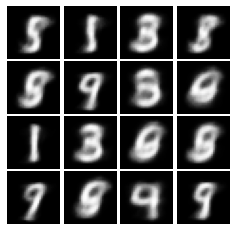

loss is 161.6643524169922at iteration 6000


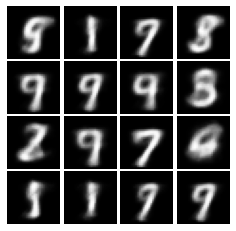

loss is 161.9635772705078at iteration 7000


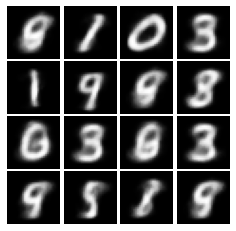

loss is 167.88482666015625at iteration 8000


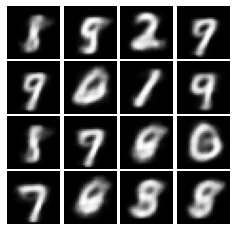

loss is 166.8516845703125at iteration 9000


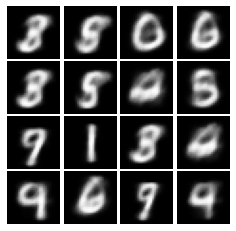

Tensor("random_normal_6:0", shape=(784, 256), dtype=float32)
Tensor("random_normal_7:0", shape=(256, 8), dtype=float32)
Tensor("random_normal_8:0", shape=(256, 8), dtype=float32)
Tensor("random_normal_9:0", shape=(8, 256), dtype=float32)
Tensor("random_normal_10:0", shape=(256, 784), dtype=float32)
loss is 595.3482055664062at iteration 0


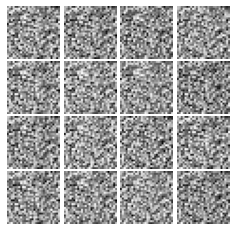

loss is 141.2412109375at iteration 1000


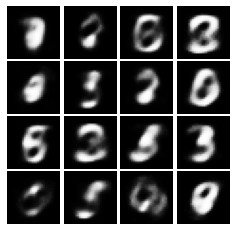

loss is 151.6046142578125at iteration 2000


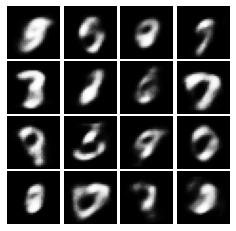

loss is 129.27529907226562at iteration 3000


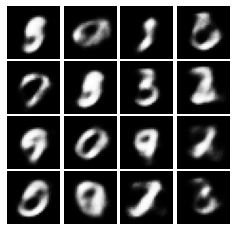

loss is 135.07308959960938at iteration 4000


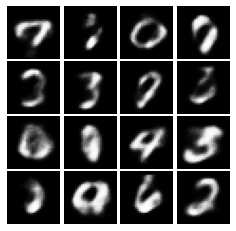

loss is 124.79493713378906at iteration 5000


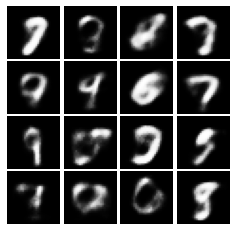

loss is 121.28047180175781at iteration 6000


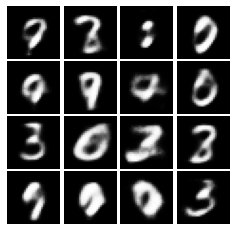

loss is 123.53040313720703at iteration 7000


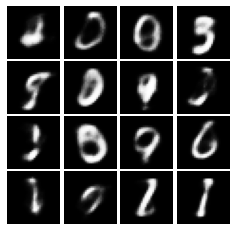

loss is 124.2574234008789at iteration 8000


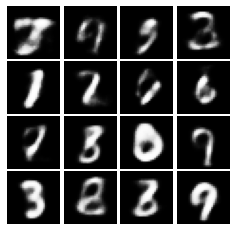

loss is 120.94541931152344at iteration 9000


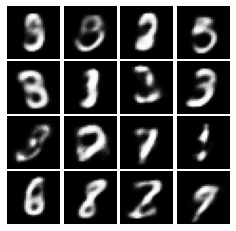

Tensor("random_normal_12:0", shape=(784, 256), dtype=float32)
Tensor("random_normal_13:0", shape=(256, 16), dtype=float32)
Tensor("random_normal_14:0", shape=(256, 16), dtype=float32)
Tensor("random_normal_15:0", shape=(16, 256), dtype=float32)
Tensor("random_normal_16:0", shape=(256, 784), dtype=float32)
loss is 631.4956665039062at iteration 0


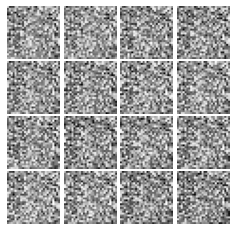

loss is 130.71075439453125at iteration 1000


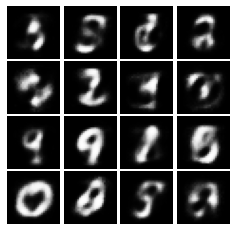

loss is 134.69613647460938at iteration 2000


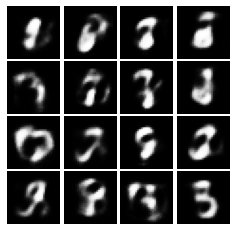

loss is 125.21814727783203at iteration 3000


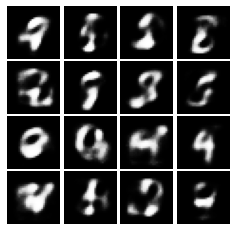

loss is 124.49775695800781at iteration 4000


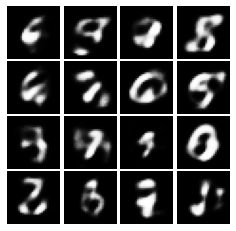

loss is 120.85427856445312at iteration 5000


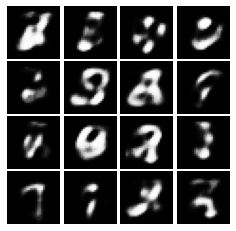

loss is 120.72860717773438at iteration 6000


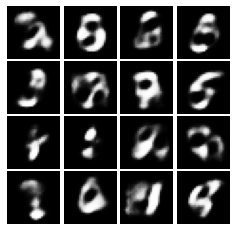

loss is 122.42760467529297at iteration 7000


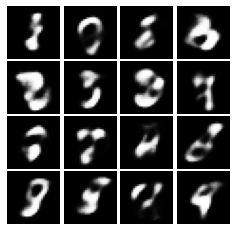

loss is 110.74322509765625at iteration 8000


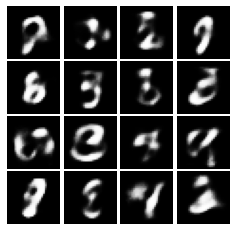

loss is 108.78408813476562at iteration 9000


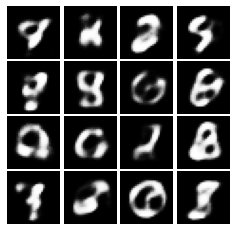

In [3]:
for latent_variable_dimension in latent_variable_dimension_list:

  #weight and bias initalization using xavier function
  weight_encoder=tf.Variable(xavier([image_dimension,neural_network_dimension]))
  weight_mean_hidden=tf.Variable(xavier([neural_network_dimension,latent_variable_dimension]))
  weight_SD_hidden=tf.Variable(xavier([neural_network_dimension,latent_variable_dimension]))

  weight_decoder_hidden=tf.Variable(xavier([latent_variable_dimension,neural_network_dimension]))
  weight_decoder=tf.Variable(xavier([neural_network_dimension,image_dimension]))



  bias_encoder=tf.Variable(tf.zeros([neural_network_dimension]))
  bias_mean_hidden=tf.Variable(tf.zeros([latent_variable_dimension]))
  bias_std_hidden=tf.Variable(tf.zeros([latent_variable_dimension]))
  bias_matrix_decoder_hidden=tf.Variable(tf.zeros([neural_network_dimension]))
  bias_decoder=tf.Variable(tf.zeros([image_dimension]))



  #encoder
 
  X_img=tf.placeholder(tf.float32,shape=[None,image_dimension])

  Encoder_layer=tf.nn.sigmoid(tf.matmul(X_img,weight_encoder)+bias_encoder)

  Mean_layer=tf.matmul(Encoder_layer,weight_mean_hidden)+bias_mean_hidden
  SD_layer=tf.matmul(Encoder_layer,weight_SD_hidden)+bias_std_hidden


  #reparametrization trick

  epsilon=tf.random_normal(tf.shape(Mean_layer))
  latent_layer=Mean_layer+tf.exp(0.5*SD_layer)*epsilon

  #decoder layer
  Decoder_hidden_layer=tf.nn.sigmoid(tf.matmul(latent_layer,weight_decoder_hidden)+bias_matrix_decoder_hidden)
  Decoder_output=tf.nn.sigmoid(tf.matmul(Decoder_hidden_layer,weight_decoder)+bias_decoder) 

  
  #calculate the loss function
  loss_value=loss_function(X_img,Decoder_output)
  optimizer=tf.train.AdamOptimizer().minimize(loss_value)

  init=tf.global_variables_initializer()
  
  #testing
  noise_x=tf.placeholder(tf.float32,shape=[None,latent_variable_dimension])
  Decoder_hidden_layer=tf.nn.sigmoid(tf.matmul(noise_x,weight_decoder_hidden)+bias_matrix_decoder_hidden)
  Decoder_output=tf.nn.sigmoid(tf.matmul(Decoder_hidden_layer,weight_decoder)+bias_decoder)
  

  sess=tf.Session()
  sess.run(init)

  for i in range(10000):
     x_batch,_=MNIST.train.next_batch(batch_size)
     _,loss=sess.run([optimizer,loss_value],feed_dict={X_img:x_batch})
     if i%1000 == 0:
         print("loss is {0}at iteration {1}".format(loss,i))


         samples = sess.run(Decoder_output, feed_dict={noise_x: np.random.randn(16,latent_variable_dimension )})
         fig = plot(samples)
           
         plt.show()
         i += 1
         plt.close(fig)


Reference:
https://towardsdatascience.com/reparameterization-trick-126062cfd3c3
https://www.youtube.com/watch?v=Hlr3CYfRMf0

https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/